In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
#initialization
g = 9.81
CD = 1.0/40.0
CL = 1.0
vt = 30
vt2 = vt**2
v0,theta0,x0,y0= vt,0.0,0.0,1000.0
T = 100
dt = 0.1

In [3]:
#Euler method
def euler(T,dt):
    N = int(T/dt)+1
    t = numpy.arange(0.0, T+dt, dt)
    u = numpy.zeros((N,4))
    u[0,:] = [v0,theta0,x0,y0]
    
    for n in range(0,N-1):
        f_n = numpy.array([
            -g*numpy.sin(u[n,1])-CD/CL*g/vt2*u[n,0]**2,
            -g/u[n,0]*numpy.cos(u[n,1]) + g/vt2 * u[n,0],
            u[n,0]*numpy.cos(u[n,1]),
            u[n,0]*numpy.sin(u[n,1])
        ])
        u[n+1] = u[n] + dt * f_n
    return u

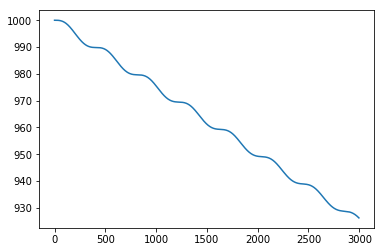

In [4]:
u = euler(T,dt)
pyplot.plot(u[:,2],u[:,3]);

Calculate order of convergence

In [14]:
r = 2
dt3 = 0.004 #largest
dt2 = dt3/r
dt1 = dt2/r

f3 = euler(T,dt3)
f2 = euler(T,dt2)
f1 = euler(T,dt1)

In [19]:
f32 = 0
for n in range(len(f3)):
    f32 = f32 + numpy.abs(f3[n, 0] - f2[r*n, 0]) + numpy.abs(f3[n, 1] - f2[r*n, 1]) + numpy.abs(f3[n, 2] - f2[r*n, 2])+ numpy.abs(f3[n, 3] - f2[r*n, 3])
f32 = f32*dt3

In [20]:
f21 = 0
for n in range(len(f2)):
    f21 = f21 + numpy.abs(f2[n, 0] - f1[r*n, 0])+ numpy.abs(f2[n, 1] - f1[r*n, 1]) + numpy.abs(f2[n, 2] - f1[r*n, 2])+ numpy.abs(f2[n, 3] - f1[r*n, 3])
f21 = f21*dt2

In [21]:
p = numpy.log10(f32/f21)/numpy.log10(r)

In [22]:
print(p)

1.0138644205997545
